In [2]:
%matplotlib inline

from seabird.cnv import fCNV

In [3]:
profile = fCNV('dhe623_09.cnv')

In [4]:
print ("The profile coordinates is latitude: %.4f, and longitude: %.4f" % \
    (profile.attributes['LATITUDE'], profile.attributes['LONGITUDE']))

The profile coordinates is latitude: 54.0458, and longitude: 7.9893


In [5]:
print("Header: %s" % profile.attributes.keys())
print(profile.attributes)

Header: dict_keys(['sbe_model', 'LATITUDE', 'LONGITUDE', 'gps_datetime', 'seasave', 'instrument_type', 'nquan', 'nvalues', 'start_time', 'bad_flag', 'file_type', 'md5', 'datetime', 'filename'])
{'sbe_model': '9', 'LATITUDE': 54.045833333333334, 'LONGITUDE': 7.989333333333334, 'gps_datetime': 'Jun 26 2023  08:17:21', 'seasave': 'V 7.23.1', 'instrument_type': 'CTD', 'nquan': '19', 'nvalues': '123', 'start_time': 'Jun 26 2023 08:17:21 [NMEA time, first data scan]', 'bad_flag': '-9.990e-29', 'file_type': 'ascii', 'md5': '6e38c487fb1d020e51ea7ec795a9bf72', 'datetime': datetime.datetime(2023, 6, 26, 8, 17, 21), 'filename': 'dhe623_09.cnv'}


In [6]:
print(profile.keys())

['PRES', 'TEMP', 'TEMP2', 'c0mS/cm', 'c1mS/cm', 'PSAL', 'PSAL2', 'scan', 'altM', 'flECO-AFL', 'CStarTr0', 'oxygen_ml_L', 'sbeox1ML/L', 'v0', 'v2', 'v3', 'v6', 'nbin', 'flag']


In [7]:
profile['TEMP2'][:25]

masked_array(data=[18.1734, 18.1231, 18.3078, 18.3996, 18.4314, 18.3962,
                   18.3267, 18.3195, 18.4041, 18.3777, 18.2113, 18.1937,
                   18.237, 18.1833, 18.1378, 18.0736, 18.0634, 17.8207,
                   17.3436, 16.911, 16.6411, 16.2911, 15.9561, 15.6001,
                   15.3929],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False],
       fill_value=-9.99e-29)

In [8]:
print(profile['TEMP'].mean(), profile['TEMP'].std())
print(profile['TEMP2'].mean(), profile['TEMP2'].std())

13.36289426229508 2.3118547570982693
13.39171393442623 2.32571668077435


In [11]:
%matplotlib qt5
plt.rcParams.update({'font.size': 18,'font.family':'serif','font.serif':'Arial'})

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'dhe623_09.cnv')

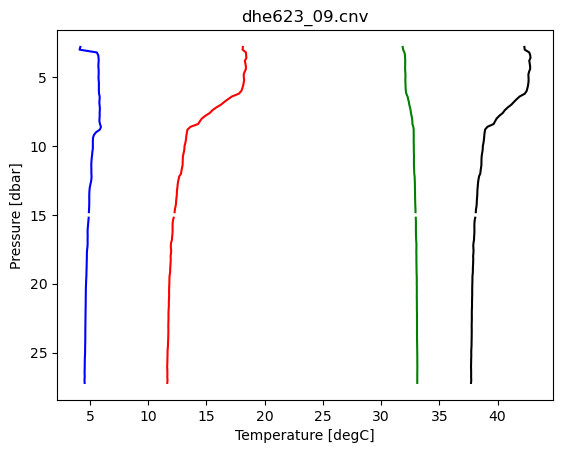

In [9]:
from matplotlib import pyplot as plt

plt.plot(profile['TEMP'], profile['PRES'],'r')
plt.plot(profile['PSAL'], profile['PRES'],'g')
plt.plot(profile['oxygen_ml_L'], profile['PRES'],'b')
plt.plot(profile['c0mS/cm'], profile['PRES'],'black')
#plt.plot(profile['TEMP2'], profile['PRES'],'g')
plt.gca().invert_yaxis()
plt.xlabel('Temperature [degC]')
plt.ylabel('Pressure [dbar]')
plt.title(profile.attributes['filename'])

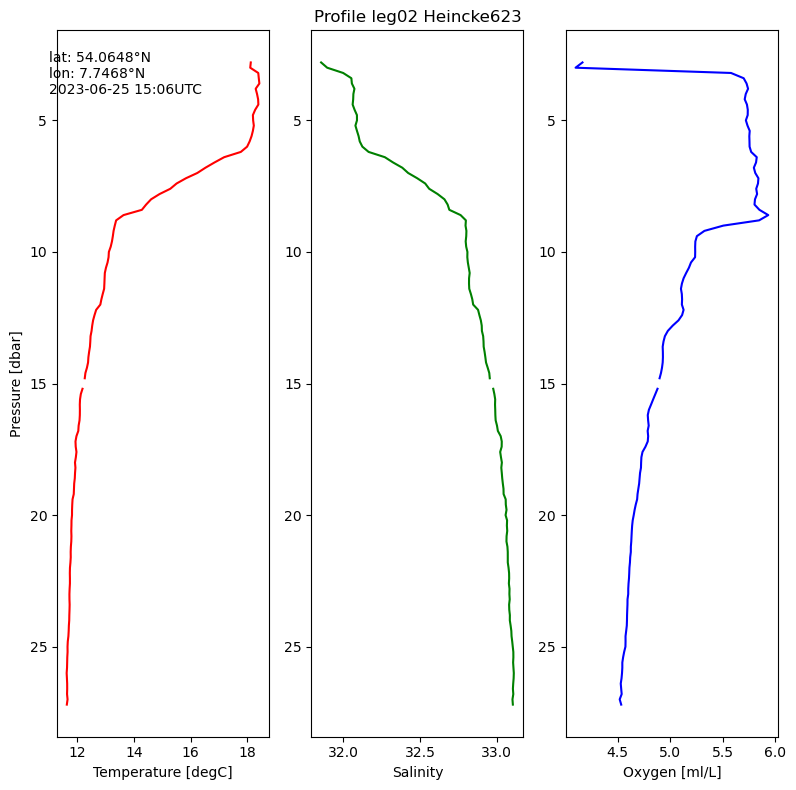

In [64]:
from matplotlib import pyplot as plt

# Cria uma figura com 3 subplots em uma coluna
fig, axs = plt.subplots(1,3, sharex=False, figsize=(8, 8))

# Primeiro gráfico (TEMP vs PRES)
axs[0].plot(profile['TEMP'], profile['PRES'], 'r')
axs[0].invert_yaxis()
axs[0].set_xlabel('Temperature [degC]')
axs[0].set_ylabel('Pressure [dbar]')
axs[0].text(11,4, 'lat: 54.0648°N \nlon: 7.7468°N \n2023-06-25 15:06UTC', fontsize=10, color='black')

# Segundo gráfico (PSAL vs PRES)
axs[1].plot(profile['PSAL'], profile['PRES'], 'g')
axs[1].invert_yaxis()
axs[1].set_xlabel('Salinity')
axs[1].set_title('Profile leg02 Heincke623')

# Terceiro gráfico (oxygen_ml_L vs PRES)
axs[2].plot(profile['oxygen_ml_L'], profile['PRES'], 'b') 
axs[2].invert_yaxis()
axs[2].set_xlabel('Oxygen [ml/L]')

#plot distance 
plt.tight_layout()

# Mostra os gráficos
plt.show()

In [65]:
df = profile.as_DataFrame()
df

,PRES,TEMP,TEMP2,c0mS/cm,c1mS/cm,PSAL,PSAL2,scan,altM,flECO-AFL,...,sbeox1ML/L,v0,v2,v3,v6,nbin,flag,LATITUDE,LONGITUDE,datetime_first_scan
0,2.8,18.1217,18.1734,42.306934,42.353386,31.8551,31.8536,-23.0,19.16,0.3588,...,4.41369,0.9578,3.7709,0.0433,2.0869,1.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
1,3.0,18.1026,18.1231,42.336037,42.362041,31.8947,31.9010,30.0,23.27,0.3983,...,4.33415,1.1632,3.7700,0.0448,2.0730,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
2,3.2,18.3860,18.3078,42.726349,42.682240,31.9989,32.0239,1572.0,28.62,0.8453,...,5.85852,1.4308,3.7633,0.0613,2.6336,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
3,3.4,18.4046,18.3996,42.807793,42.796799,32.0524,32.0469,1803.0,27.13,0.8451,...,6.08042,1.3565,3.7687,0.0613,2.6970,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
4,3.6,18.4248,18.4314,42.830605,42.833023,32.0557,32.0521,1857.0,26.91,0.8545,...,6.10881,1.3455,3.7660,0.0617,2.7074,4.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,26.4,11.6393,11.6410,37.734219,37.731007,33.1074,33.1026,4397.0,4.49,8.4050,...,4.81832,0.2247,3.1413,0.3413,2.0259,4.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
119,26.6,11.6403,11.6370,37.733273,37.728283,33.1054,33.1033,4444.0,4.22,7.3961,...,4.83033,0.2109,3.0728,0.3039,2.0250,4.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
120,26.8,11.6350,11.6351,37.731365,37.725903,33.1080,33.1025,4554.0,4.07,7.3949,...,4.82976,0.2036,3.1110,0.3039,2.0255,3.0,0.0,54.045833,7.989333,2023-06-26 08:17:21
121,27.0,11.6532,11.6457,37.743584,37.730556,33.1026,33.0966,4976.0,3.83,7.3347,...,4.82434,0.1911,3.0975,0.3016,2.0215,1.0,0.0,54.045833,7.989333,2023-06-26 08:17:21


In [66]:
df.to_csv('df_dhe623_09.csv', index=False)

In [67]:
print(df)

     PRES     TEMP    TEMP2    c0mS/cm    c1mS/cm     PSAL    PSAL2    scan  \
0     2.8  18.1217  18.1734  42.306934  42.353386  31.8551  31.8536   -23.0   
1     3.0  18.1026  18.1231  42.336037  42.362041  31.8947  31.9010    30.0   
2     3.2  18.3860  18.3078  42.726349  42.682240  31.9989  32.0239  1572.0   
3     3.4  18.4046  18.3996  42.807793  42.796799  32.0524  32.0469  1803.0   
4     3.6  18.4248  18.4314  42.830605  42.833023  32.0557  32.0521  1857.0   
..    ...      ...      ...        ...        ...      ...      ...     ...   
118  26.4  11.6393  11.6410  37.734219  37.731007  33.1074  33.1026  4397.0   
119  26.6  11.6403  11.6370  37.733273  37.728283  33.1054  33.1033  4444.0   
120  26.8  11.6350  11.6351  37.731365  37.725903  33.1080  33.1025  4554.0   
121  27.0  11.6532  11.6457  37.743584  37.730556  33.1026  33.0966  4976.0   
122  27.2  11.6275  11.6250  37.722080  37.718929  33.1051  33.1042  5177.0   

      altM  flECO-AFL  ...  sbeox1ML/L      v0     